<div style='background-color:#443025; padding: 15px; border-radius: 5px;'>
<h1 style='color:#FEFEFE; text-align:center;'> Chocolate Sales Analysis – Data Analytics Project</h1>
</div>

---

<h2 style='color:#714737;'>Objectives</h2>

- Load and preprocess the Chocolate dataset.
- Clean the dataset by removing columns not required,standardise date column,normalise and convert columns where needed.
- Perform exploratory data analysis (EDA) to understand data distribution and relationships.



<h2 style='color:#714737;'>Inputs</h2>

- **Dataset:** kagglehub.dataset_download("atharvasoundankar/chocolate-sales")
- **Required Libraries:** Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, Plotly

- **Columns of Interest:** 'Sales Person', 'Country', 'Product', 'Date', 'Amount', 'Boxes Shipped'

 
  
<h2 style='color:#714737;'>Outputs</h2>

- **Cleaned dataset:** Processed dataset stored as a CSV file for analysis (`df_cleaned.csv`).
- **Exploratory Data Analysis (EDA):**
  - Understanding the data types and statistics in analysis.
  - Observing the distribution or features in column.
  - Identify outliers in numerical data.
  - Compare categorical variables with the target variable (Revenue Total).
- **Feature-engineered dataset:** Enhanced dataset with new derived features.
- **Insights & Summary Reports:** Key findings documented for further decision-making.

<h2 style='color:#714737;'>Additional Comments</h2>

- Ensure proper handling of missing, duplicated and outlier values to maintain data integrity.
- Remove names of sales persons to avoid ethical concerns as we are not using that data column.




<h2 style='color:#714737;'>Changing work directory</h2>

To run the notebook in the editor, the working directory needs to be changed from its current folder to its parent folder. Thus, we first access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/hafeezahfagbo/Chocolate-Sales-Analysis/jupyter_notebooks'

Then we make the parent of the current directory the new current directory by using:
  * os.path.dirname() to get the parent directory
  * os.chir() to define the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory.")

You set a new current directory.


Confirming the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/Users/hafeezahfagbo/Chocolate-Sales-Analysis'

<h2 style='color:#714737;'>Importing Libraries and Packages</h2>

Loading Python packages that we will be using in this project to carry out the analysis. For example Numpy to compute numerical operations and handle arrays, Pandas for data manipulation and analysis, Matplotlib, Seaborn and Plotly to create different data visualisations

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px
from scipy.stats import chi2_contingency, kurtosis, skew
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

---

<h2 style='color:#714737;'> Data Analysis</h2>

Loading the CSV dataset containing the data collected previously and extracting it into dataframe using pd.read_csv() function. Then using .head() to perview the dataset

In [5]:
df = pd.read_csv("Output/df_cleaned.csv")
df.head()

,Country,Product,Date,Amount,Boxes Shipped,Product Category,Month,Day,Month Name,Revenue per Box Shipped
0,UK,Mint Chip Choco,2022-01-04,5320.0,180,Flavored Chocolate,1,4,January,30.0
1,India,85% Dark Bars,2022-08-01,7896.0,94,Dark Chocolate,8,1,August,84.0
2,India,Peanut Butter Cubes,2022-07-07,4501.0,91,Nut-based Chocolate,7,7,July,49.0
3,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342,Nut-based Chocolate,4,27,April,37.0
4,UK,Peanut Butter Cubes,2022-02-24,13685.0,184,Nut-based Chocolate,2,24,February,74.0


<h2 style='color:#714737;'> Aggregate sales by country,product and product category</h2>

In [24]:
# Calculate total sales per country
total_sales_by_country = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)

# Calculate total sales per product
total_sales_by_product = df.groupby('Product')['Amount'].sum().sort_values(ascending=False)

# Calculate total sales per product category
total_sales_by_category = df.groupby('Product Category')['Amount'].sum().sort_values(ascending=False)

# Print results
print("Total Sales by Country:")
print(total_sales_by_country)
print("\nTop 5 Products by Sales:")
print(total_sales_by_product.head())
print("\nTotal Sales by Product Category:")
print(total_sales_by_category)


Total Sales by Country:
Country
Australia      1137367.0
UK             1051792.0
India          1045800.0
USA            1035349.0
Canada          962899.0
New Zealand     950418.0
Name: Amount, dtype: float64

Top 5 Products by Sales:
Product
Smooth Sliky Salty     349692.0
50% Dark Bites         341712.0
White Choc             329147.0
Peanut Butter Cubes    324842.0
Eclairs                312445.0
Name: Amount, dtype: float64

Total Sales by Product Category:
Product Category
Flavored Chocolate        1864583.0
Specialty Chocolate       1724436.0
Dark Chocolate            1152347.0
Nut-based Chocolate        843864.0
Milk & White Chocolate     598395.0
Name: Amount, dtype: float64


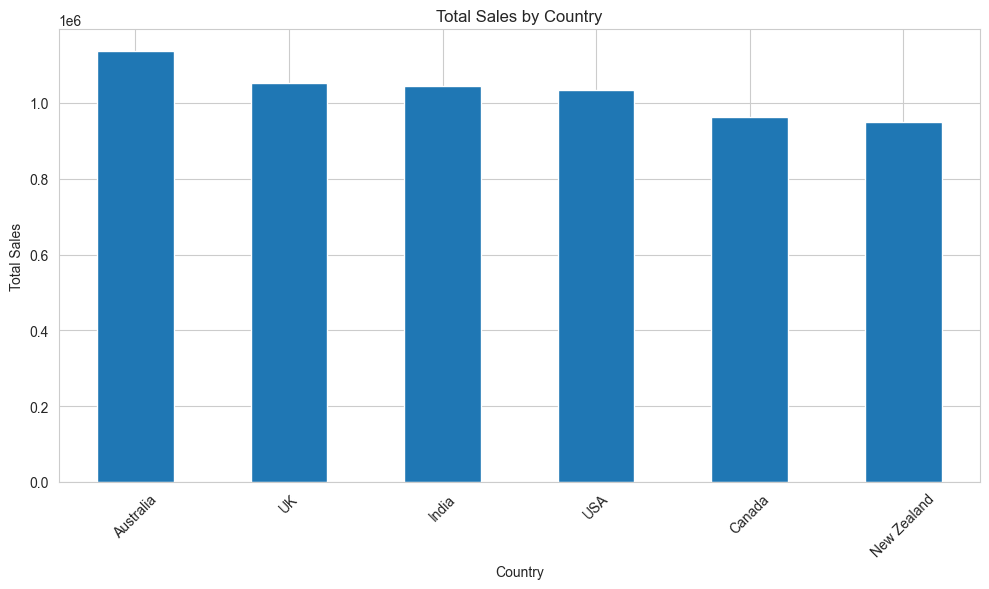

In [25]:

# Visualize total sales by country
plt.figure(figsize=(10, 6))
total_sales_by_country.plot(kind='bar')
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

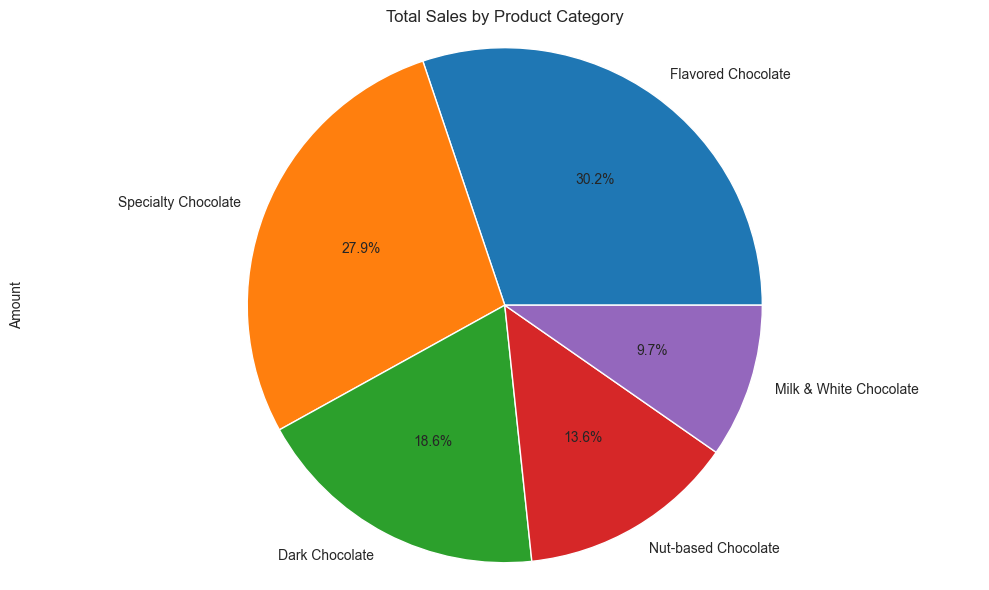

In [26]:
# Visualize total sales by product category
plt.figure(figsize=(10, 6))
total_sales_by_category.plot(kind='pie', autopct='%1.1f%%')
plt.title('Total Sales by Product Category')
plt.axis('equal')
plt.tight_layout()
plt.show()

<h2 style='color:#714737;'> TOP 5 PRODUCTS BY REVENUE</h2>


Top 5 Products by Total Revenue:
Product
Smooth Sliky Salty     349692.0
50% Dark Bites         341712.0
White Choc             329147.0
Peanut Butter Cubes    324842.0
Eclairs                312445.0
Name: Amount, dtype: float64


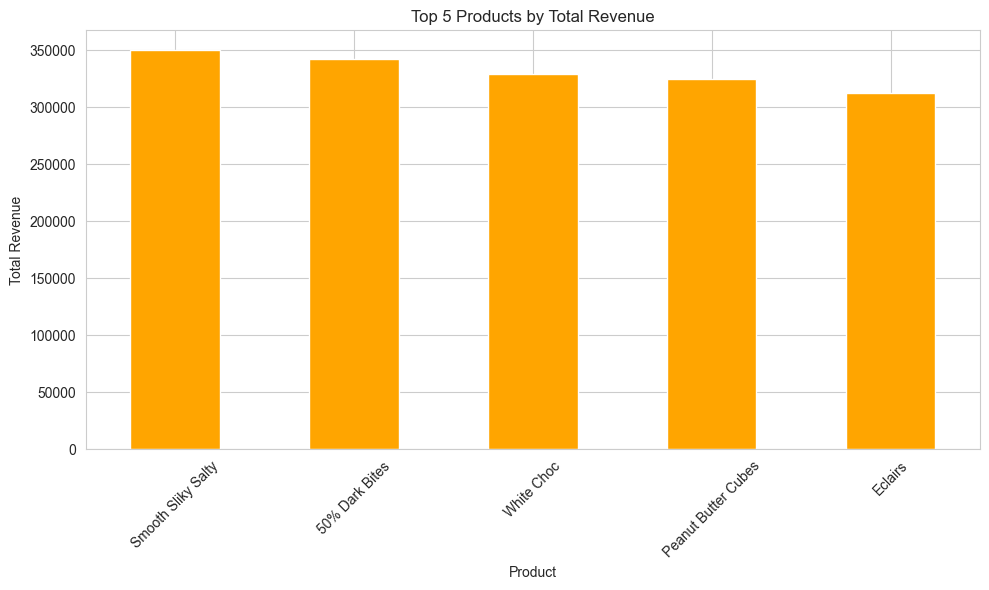

In [27]:
# Top 5 Products by Total Revenue
top_products = df.groupby('Product')['Amount'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Products by Total Revenue:")
print(top_products)

# Plot Top 5 Products
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='orange')
plt.title('Top 5 Products by Total Revenue')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h2 style='color:#714737;'> REVENUE PER BOX SHIPPED</h2>


Top 5 Products by Revenue per Box Shipped:
Product
White Choc              232.000000
Mint Chip Choco         161.555556
99% Dark & Pure         146.836735
Choco Coated Almonds    120.461538
Spicy Special Slims     119.888889
Name: Revenue per Box Shipped, dtype: float64


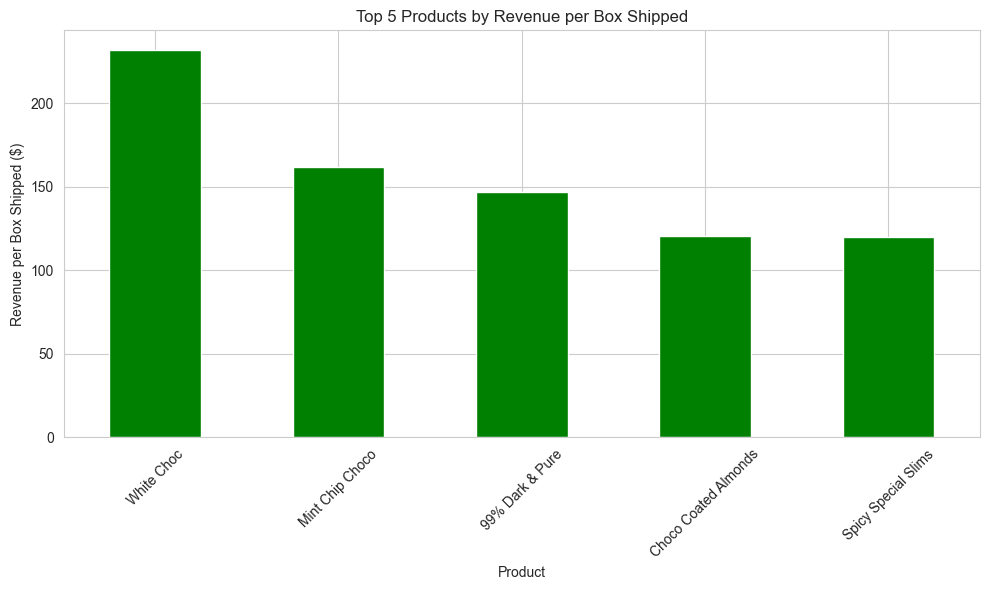

In [28]:
# Revenue per Box Shipped Analysis
revenue_per_box = df.groupby('Product')['Revenue per Box Shipped'].mean().sort_values(ascending=False).head(5)
print("\nTop 5 Products by Revenue per Box Shipped:")
print(revenue_per_box)

# Plot Revenue per Box Shipped
plt.figure(figsize=(10, 6))
revenue_per_box.plot(kind='bar', color='green')
plt.title('Top 5 Products by Revenue per Box Shipped')
plt.xlabel('Product')
plt.ylabel('Revenue per Box Shipped ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h2 style='color:#714737;'> Boxes Shipped per Country and Product Category</h2>


Boxes Shipped per Country and Product Category:
Product Category  Dark Chocolate  Flavored Chocolate  Milk & White Chocolate  \
Country                                                                        
Australia                   7835                9186                    3331   
Canada                      4641               10549                    1530   
India                       5787                9072                    2698   
New Zealand                 4329                9274                    2602   
UK                          5302                8481                    4180   
USA                         5833                9413                    2229   

Product Category  Nut-based Chocolate  Specialty Chocolate  
Country                                                     
Australia                        3979                 8316  
Canada                           4500                10001  
India                            4069                 7844  
New Z

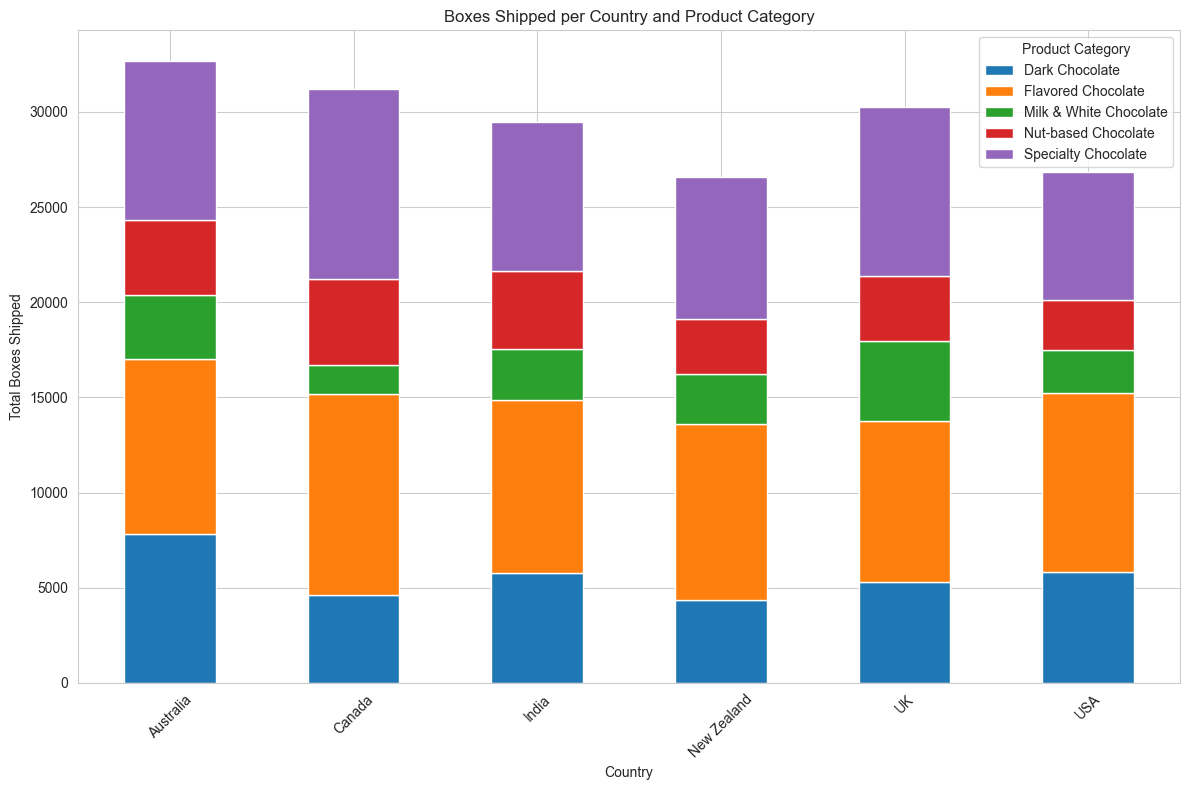

In [29]:
 #Boxes Shipped per Country and Product Category
boxes_country_category = df.groupby(['Country', 'Product Category'])['Boxes Shipped'].sum().unstack()
print("\nBoxes Shipped per Country and Product Category:")
print(boxes_country_category)

# Plot Boxes Shipped per Country and Product Category
boxes_country_category.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Boxes Shipped per Country and Product Category')
plt.xlabel('Country')
plt.ylabel('Total Boxes Shipped')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()

<h2 style= 'color:#714737;' > Boxes Shipped per Product Category</h2>


Boxes Shipped per Product Category:
Product Category
Flavored Chocolate        55975
Specialty Chocolate       49231
Dark Chocolate            33727
Nut-based Chocolate       21504
Milk & White Chocolate    16570
Name: Boxes Shipped, dtype: int64


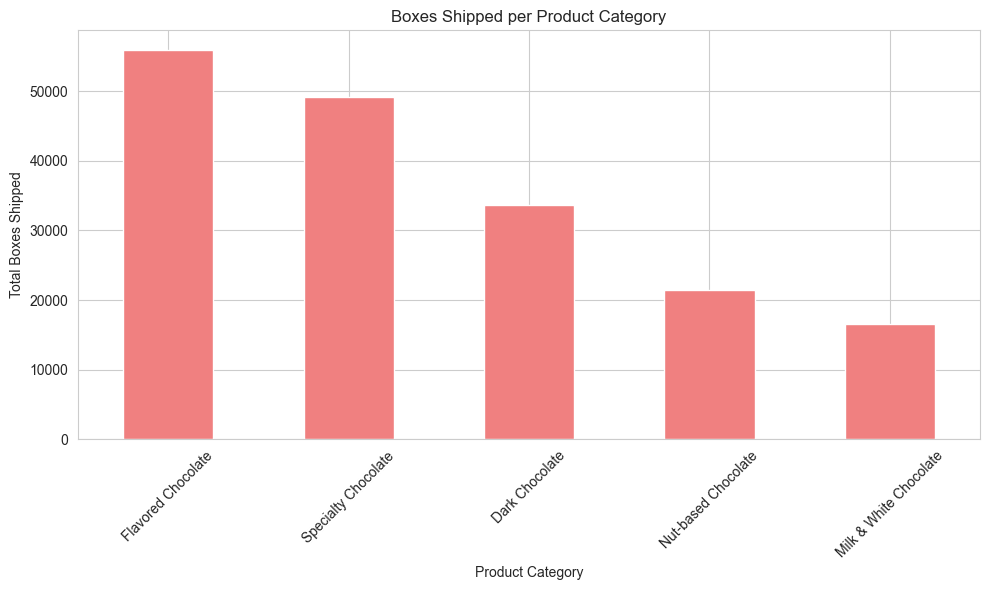

In [30]:
# Boxes Shipped per Product Category
boxes_per_category = df.groupby('Product Category')['Boxes Shipped'].sum().sort_values(ascending=False)
print("\nBoxes Shipped per Product Category:")
print(boxes_per_category)

# Plot Boxes Shipped per Product Category
plt.figure(figsize=(10, 6))
boxes_per_category.plot(kind='bar', color='lightcoral')
plt.title('Boxes Shipped per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Boxes Shipped')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h2 style='color:#714737;'> Advance Exploratory Data Analysis</h2>